In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from models import CNN1DText
#import json
import random
import os
from data_process import EmbeddingManager


#import os

from evaluation_tool import EvaluationManager

import models

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
used_embedding = 'sgns.zhihu.word'
embedding_dir = 'embedding_tensor'
load_cache_model = "model_cache/model"

embedding_manager = EmbeddingManager(used_embedding, embedding_dir)


# prepare data
print("loading data")
feature_list, target_list = embedding_manager.load_data('traning_data.json')
feature_list_test, target_list_test = embedding_manager.load_data('testing_data.json')


loading data
size 6280 -> 6143
size 320 -> 306


In [5]:

model = models.CNNV2(embed_num = 259922, embed_dim = 300, class_num = 2, kernel_num = 100, kernel_sizes = (3,4,5),
                dropout = 0.5)

#embedding_obj = torch.load(os.path.join(embedding_dir, used_embedding))
#model.use_pretrained_embedding(embedding_obj['tensor'], non_trainable = True)

In [6]:
# The creating and training process is done in end of compare.ipynb

model.load_state_dict(torch.load('model_cache/model_CNNV2_201811161333'))

In [7]:
cuda = True
if cuda:

    feature_list = [feature.cuda() for feature in feature_list]
    target_list = [target.cuda() for target in target_list]
    feature_list_test = [feature.cuda() for feature in feature_list_test]
    target_list_test = [target.cuda() for target in target_list_test]

    model.cuda()


In [8]:
model.train(False)

evaluation_manager = EvaluationManager(model, embedding_manager, cuda = cuda)


In [9]:
evaluation_manager = EvaluationManager(model, embedding_manager, cuda = cuda)


In [10]:
self = evaluation_manager
doc_path = 'extracted_text/AI报告_杨帆_117106010714.docx.txt'

In [11]:
from utils import generate_doc, generate_doc_flatten


In [12]:
embedding_manager = self.embedding_manager
model = self.model

doc = generate_doc_flatten(doc_path)
doc_idxs = embedding_manager.word2idx(doc)
if self.cuda:
    doc_idxs = doc_idxs.cuda()

print(f'origin length:{len(doc)} extracted length: {doc_idxs.size()}')
        


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\YIYUEZ~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.798 seconds.
Prefix dict has been built succesfully.


origin length:6889 extracted length: torch.Size([1, 5939])


In [44]:
ser0 = model(doc_idxs)


In [45]:
ser0.size()

torch.Size([1, 2, 5915])

In [46]:
ser0.mean(),ser0.std()

(tensor(0.1386, device='cuda:0', grad_fn=<MeanBackward1>),
 tensor(6.3998, device='cuda:0', grad_fn=<StdBackward0>))

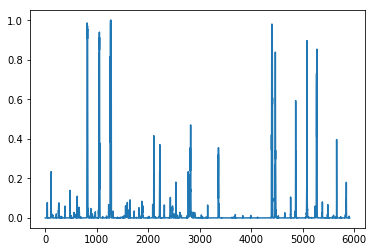

In [15]:
plt.plot(F.softmax(res, 1)[0,1,:].cpu().detach().numpy())

In [16]:
ser = evaluation_manager.analysis_doc_batch('extracted_text/AI报告_张佳洛_117106021976.docx.txt')

origin:4332 encoded: torch.Size([1, 3823]) output: torch.Size([1, 2, 3799])


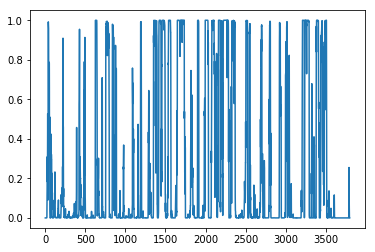

In [17]:
plt.plot(ser.cpu().detach().numpy())

In [42]:
ser.mean(),ser.std()

(tensor(0.2642, device='cuda:0', grad_fn=<MeanBackward1>),
 tensor(0.3944, device='cuda:0', grad_fn=<StdBackward0>))

In [18]:
import json
with open('traning_data.json', encoding='utf8') as f:
    training_data = json.load(f)
with open('testing_data.json', encoding='utf8') as f:
    testing_data = json.load(f)
    
training_data.keys()

dict_keys(['word_list', 'label_list', 'count_list', 'name_list'])

In [19]:
import os
def refine_name_list(name_list, new_root = 'extracted_text'):
    new_name_list = []
    for name in name_list:
        stat_path = os.path.splitext(name)[0]
        name = os.path.split(stat_path)[1]
        path = os.path.join(new_root, name)
        new_name_list.append(path)
    return new_name_list

In [20]:
training_prob_list = []
for path in refine_name_list(training_data['name_list']):
    print(f'analysing {path}')
    training_prob_list.append(evaluation_manager.analysis_doc_batch(path).cpu().detach().numpy()) 
    # if save gpu tensor directly, we will find out of gpu memory.


analysing extracted_text\AI 报告_吕超贤_117106010741.docx.txt
origin:5656 encoded: torch.Size([1, 5138]) output: torch.Size([1, 2, 5114])
analysing extracted_text\AI 报告_唐伟_117106010729.docx.txt
origin:5124 encoded: torch.Size([1, 4215]) output: torch.Size([1, 2, 4191])
analysing extracted_text\AI 报告_宋梦菲_117106010766.pdf.txt
origin:6365 encoded: torch.Size([1, 4525]) output: torch.Size([1, 2, 4501])
analysing extracted_text\AI 报告_张亮_117106021947.docx.txt
origin:4568 encoded: torch.Size([1, 3448]) output: torch.Size([1, 2, 3424])
analysing extracted_text\AI 报告_蔡鸿杰_117106010756.docx.txt
origin:4514 encoded: torch.Size([1, 3873]) output: torch.Size([1, 2, 3849])
analysing extracted_text\AI 报告_许成豪_117106021893 (1).docx.txt
origin:1916 encoded: torch.Size([1, 1812]) output: torch.Size([1, 2, 1788])
analysing extracted_text\AI 报告_许成豪_117106021893.docx.txt
origin:3362 encoded: torch.Size([1, 3147]) output: torch.Size([1, 2, 3123])
analysing extracted_text\AI 报告_许杰_117106010696.docx.txt
origin:3388 

analysing extracted_text\AI报告_宋燕军_117106010743.docx.txt
origin:6641 encoded: torch.Size([1, 5370]) output: torch.Size([1, 2, 5346])
analysing extracted_text\AI报告_居思刚_117106021957.docx.txt
origin:5991 encoded: torch.Size([1, 5584]) output: torch.Size([1, 2, 5560])
analysing extracted_text\AI报告_庾安妮_117106021905 (1).docx.txt
origin:4280 encoded: torch.Size([1, 3471]) output: torch.Size([1, 2, 3447])
analysing extracted_text\AI报告_庾安妮_117106021905.docx.txt
origin:4273 encoded: torch.Size([1, 3466]) output: torch.Size([1, 2, 3442])
analysing extracted_text\AI报告_张佳洛_117106021976.docx.txt
origin:4332 encoded: torch.Size([1, 3823]) output: torch.Size([1, 2, 3799])
analysing extracted_text\AI报告_张基文_117106021920.docx.txt
origin:3609 encoded: torch.Size([1, 3297]) output: torch.Size([1, 2, 3273])
analysing extracted_text\AI报告_张子辰_117106021979.docx.txt
origin:3544 encoded: torch.Size([1, 3171]) output: torch.Size([1, 2, 3147])
analysing extracted_text\AI报告_张寓_117106010687.docx.txt
origin:4358 encod

origin:6144 encoded: torch.Size([1, 4970]) output: torch.Size([1, 2, 4946])
analysing extracted_text\AI报告_董福洋_117106032707.doc.txt
origin:4142 encoded: torch.Size([1, 3604]) output: torch.Size([1, 2, 3580])
analysing extracted_text\AI报告_蒋鹏飞_117106021927.docx.txt
origin:10363 encoded: torch.Size([1, 9181]) output: torch.Size([1, 2, 9157])
analysing extracted_text\AI报告_薛栋吉_117106010684.pdf.txt
origin:6171 encoded: torch.Size([1, 4859]) output: torch.Size([1, 2, 4835])
analysing extracted_text\AI报告_袁伟强_117106010727.docx.txt
origin:6293 encoded: torch.Size([1, 5312]) output: torch.Size([1, 2, 5288])
analysing extracted_text\AI报告_訾烨_117106010694.docx.txt
origin:6872 encoded: torch.Size([1, 6010]) output: torch.Size([1, 2, 5986])
analysing extracted_text\AI报告_许燕_117106010737.docx.txt
origin:5036 encoded: torch.Size([1, 4441]) output: torch.Size([1, 2, 4417])
analysing extracted_text\AI报告_许诗瑞_117106021925.docx.txt
origin:3666 encoded: torch.Size([1, 3279]) output: torch.Size([1, 2, 3255])
ana

In [21]:
testing_prob_list = []
for path in refine_name_list(testing_data['name_list']):
    print(f'analysing {path}')
    testing_prob_list.append(evaluation_manager.analysis_doc_batch(path).cpu().detach().numpy())


analysing extracted_text\AI报告-吴胖-117106032748.doc.txt
origin:3864 encoded: torch.Size([1, 3280]) output: torch.Size([1, 2, 3256])
analysing extracted_text\AI报告-吴轶凡-117106021953.docx.txt
origin:3857 encoded: torch.Size([1, 3426]) output: torch.Size([1, 2, 3402])
analysing extracted_text\AI报告-姚文-117106021903.doc.txt
origin:5269 encoded: torch.Size([1, 4600]) output: torch.Size([1, 2, 4576])
analysing extracted_text\AI报告-张亚楠-117106021921 (1).docx.txt
origin:4182 encoded: torch.Size([1, 3850]) output: torch.Size([1, 2, 3826])
analysing extracted_text\AI报告-张亚楠-117106021921.docx.txt
origin:4182 encoded: torch.Size([1, 3858]) output: torch.Size([1, 2, 3834])
analysing extracted_text\AI报告-张文翔-117106032746.docx.txt
origin:5113 encoded: torch.Size([1, 4357]) output: torch.Size([1, 2, 4333])
analysing extracted_text\AI报告-梁潇-117106021932.docx.txt
origin:4066 encoded: torch.Size([1, 3492]) output: torch.Size([1, 2, 3468])
analysing extracted_text\AI报告-楚榕珍-117107010882.docx.txt
origin:11514 encoded:

In [22]:
len(training_prob_list),len(training_prob_list[0])

(157, 5114)

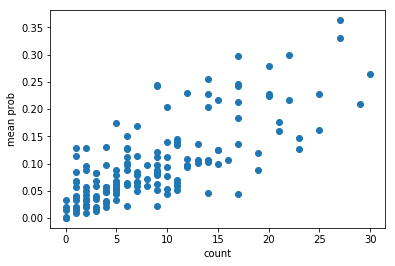

In [23]:
plt.plot(training_data['count_list'], [np.mean(prob) for prob in training_prob_list],'o')
plt.xlabel('count')
plt.ylabel('mean prob')
plt.show()

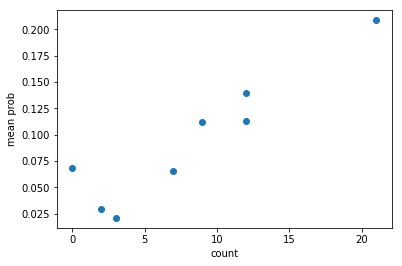

In [24]:
plt.plot(testing_data['count_list'], [np.mean(prob) for prob in testing_prob_list],'o')
plt.xlabel('count')
plt.ylabel('mean prob')
plt.show()

In [25]:
from torchviz import make_dot, make_dot_from_trace


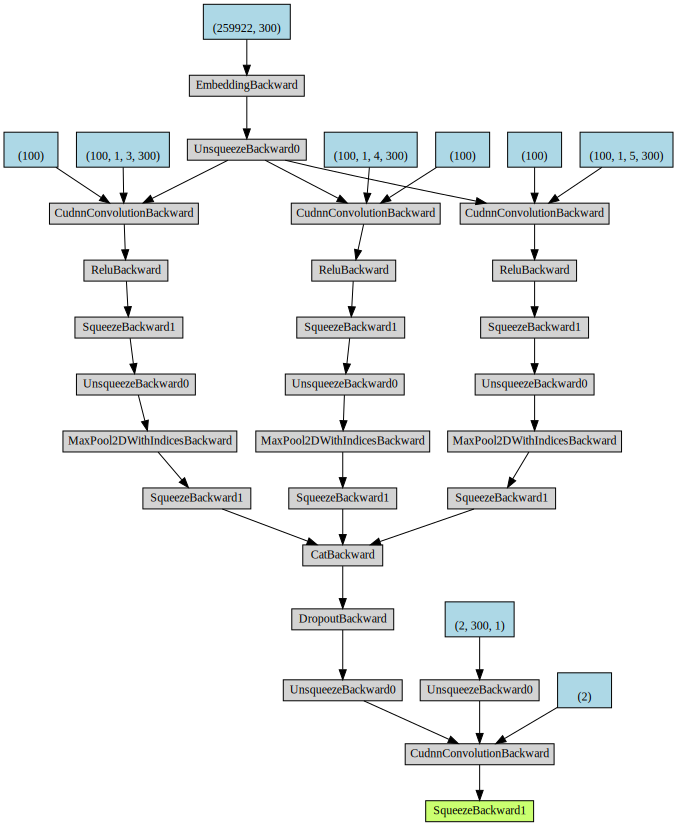

In [26]:
make_dot(model(doc_idxs))

In [37]:
#res.render("network graph",format='png')

'network graph.png'

In [38]:
def confuse_matrix(feature_list, target_list):
    mat = torch.zeros(2,2,dtype=torch.int64)
    for feature, target in zip(feature_list, target_list):
        out = model(feature)[:,:,0]
        if target[0].item() == 0:
            if out[0,0].item() > out[0,1].item():
                mat[0,0] += 1
            else:
                mat[0,1] += 1
        else:
            if out[0,0].item() > out[0,1].item():
                mat[1,0] += 1
            else:
                mat[1,1] += 1
    return mat


In [39]:
confuse_matrix(feature_list, target_list)

tensor([[4779,   22],
        [ 141, 1201]])

In [40]:
confuse_matrix(feature_list_test, target_list_test)

tensor([[231,  11],
        [ 46,  18]])